In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical #to convert the class labels for both training and testing data into this one-hot encoded format.
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist, cifar10
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

load dataset

In [25]:
# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# Load cifar10 dataset
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()

preprocess dataset

In [3]:
x_train_mnist = x_train_mnist / 255.0
x_test_mnist = x_test_mnist / 255.0

x_train_cifar10 = x_train_cifar10 / 255.0
x_train_cifar10 = x_train_cifar10 / 255.0


in mnist **dataset**

In [4]:
print(f'shape of x_train_mnist={x_train_mnist.shape} , x_test_mnist={x_test_mnist.shape} , y_train_mnist={y_train_mnist.shape} and y_test_mnist={y_test_mnist.shape}')

shape of x_train_mnist=(60000, 28, 28) , x_test_mnist=(10000, 28, 28) , y_train_mnist=(60000,) and y_test_mnist=(10000,)


In [5]:
#orginal mnist dataset (num_of_sample,28,28) single channel
#do reshape to say we have only channel (grayscale image)
x_train_mnist=x_train_mnist.reshape((x_train_mnist.shape[0],28,28,1))
x_test_mnist=x_test_mnist.reshape((x_test_mnist.shape[0],28,28,1))
#convert label to be one hot encodding
#binary matrix representation 10 classes
#enabling the labels to be utilized effectively
y_train_mnist = to_categorical(y_train_mnist)
y_test_mnist = to_categorical(y_test_mnist)
print(f'shape of x_train_mnist={x_train_mnist.shape} , x_test_mnist={x_test_mnist.shape} , y_train_mnist={y_train_mnist.shape} and y_test_mnist={y_test_mnist.shape}')

shape of x_train_mnist=(60000, 28, 28, 1) , x_test_mnist=(10000, 28, 28, 1) , y_train_mnist=(60000, 10) and y_test_mnist=(10000, 10)


LeNet-5 to complete the process of classification

In [6]:
#models is a module within Keras that provides tools to create various types of neural network models.
#Sequential is a constructor method in Keras that initializes a linear stack of layers, which is the foundation of the neural network model.
#define LeNet-5
model = models.Sequential()
# Convolutional layers
#6 represent num of filter and (5,5) 2D convolutional window
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
#take max num in each square 2*2
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#It serves as a bridge between the convolutional/pooling layers and the fully connected layers.
#transforms this 3D data into a format that can be inputted into the dense (fully connected) layers, which then perform classification based on these flattened features.
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
#last layer in NN
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train_mnist, y_train_mnist, epochs=10, batch_size=64, validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/10
938/938 [==============================] - 31s 30ms/step - loss: 0.2295 - accuracy: 0.9313 - val_loss: 0.0660 - val_accuracy: 0.9784
Epoch 2/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0687 - accuracy: 0.9787 - val_loss: 0.0438 - val_accuracy: 0.9856
Epoch 3/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0394 - val_accuracy: 0.9874
Epoch 4/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0367 - val_accuracy: 0.9882
Epoch 5/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0319 - accuracy: 0.9894 - val_loss: 0.0483 - val_accuracy: 0.9862
Epoch 6/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0328 - val_accuracy: 0.9896
Epoch 7/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0230 - accuracy: 0.9928 - val_loss: 0.0378 - val_accuracy:

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

number of Trainable parameters in each layer

In [9]:
for layer in model.layers:
    print(f"Layer Name: {layer.name}")
    print(f"Trainable Parameters: {layer.count_params()}\n")

Layer Name: conv2d
Trainable Parameters: 156

Layer Name: max_pooling2d
Trainable Parameters: 0

Layer Name: conv2d_1
Trainable Parameters: 2416

Layer Name: max_pooling2d_1
Trainable Parameters: 0

Layer Name: flatten
Trainable Parameters: 0

Layer Name: dense
Trainable Parameters: 30840

Layer Name: dense_1
Trainable Parameters: 10164

Layer Name: dense_2
Trainable Parameters: 850



confusion matrix relative to testing samples

313/313 [==============================] - 3s 8ms/step


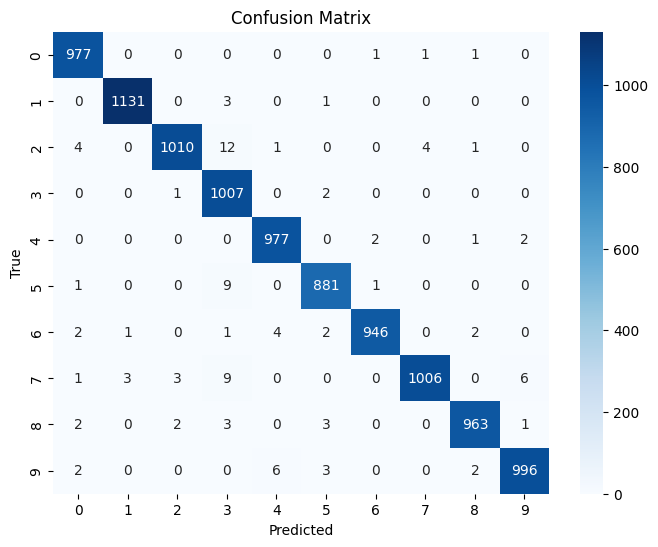

In [15]:
# Generate confusion matrix
import numpy as np
predictions = model.predict(x_test_mnist)
conf_matrix = confusion_matrix(np.argmax(y_test_mnist, axis=1), np.argmax(predictions, axis=1))
# print("Confusion Matrix:")
# print(conf_matrix)
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Calculate precision, recall, and F1 score
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_test_mnist, axis=1), np.argmax(predictions, axis=1), average='weighted')
#Precision measures the accuracy of the positive predictions made by the model.
#(TP/(TP+FP))
print(f"Precision: {precision}")
#Recall measures the ability of the model to correctly identify the positive instances from all actual positive instances.
#(TP/(TP+FN))
print(f"Recall: {recall}")
#F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
#2*((pre+recole)/(pre*recole))
print(f"F1 Score: {f1_score}")

Precision: 0.9895104049228189
Recall: 0.9894
F1 Score: 0.9894093869446983


second code cifar10

In [26]:
print(f'shape of x_train_cifar10={x_train_cifar10.shape} , x_test_cifar10={x_test_cifar10.shape} , y_train_cifar10={y_train_cifar10.shape} and y_test_cifar10={y_test_cifar10.shape}')

shape of x_train_cifar10=(50000, 32, 32, 3) , x_test_cifar10=(10000, 32, 32, 3) , y_train_cifar10=(50000, 1) and y_test_cifar10=(10000, 1)


In [28]:
#number of channel in cifar10=3
y_train_cifar10 = to_categorical(y_train_cifar10)
y_test_cifar10 = to_categorical(y_test_cifar10)
print(f'shape of x_train_cifar10={x_train_cifar10.shape} , x_test_cifar10={x_test_cifar10.shape} , y_train_cifar10={y_train_cifar10.shape} and y_test_cifar10={y_test_cifar10.shape}')

shape of x_train_cifar10=(50000, 32, 32, 3) , x_test_cifar10=(10000, 32, 32, 3) , y_train_cifar10=(50000, 10) and y_test_cifar10=(10000, 10)


In [29]:
model1=models.Sequential()
model1.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(16, (5, 5), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())
#fully
model1.add(layers.Dense(120, activation='relu'))
model1.add(layers.Dense(84,activation='relu'))
model1.add(layers.Dense(10,activation='softmax')) #one hot encodding
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(x_train_cifar10, y_train_cifar10, epochs=10, batch_size=64, validation_data=(x_test_cifar10, y_test_cifar10))

Epoch 1/10
782/782 [==============================] - 39s 49ms/step - loss: 2.3841 - accuracy: 0.2435 - val_loss: 1.7975 - val_accuracy: 0.3301
Epoch 2/10
782/782 [==============================] - 39s 50ms/step - loss: 1.7034 - accuracy: 0.3686 - val_loss: 1.6532 - val_accuracy: 0.3921
Epoch 3/10
782/782 [==============================] - 41s 53ms/step - loss: 1.5466 - accuracy: 0.4385 - val_loss: 1.5705 - val_accuracy: 0.4395
Epoch 4/10
782/782 [==============================] - 36s 46ms/step - loss: 1.4406 - accuracy: 0.4806 - val_loss: 1.5328 - val_accuracy: 0.4527
Epoch 5/10
782/782 [==============================] - 35s 45ms/step - loss: 1.3632 - accuracy: 0.5149 - val_loss: 1.4595 - val_accuracy: 0.4874
Epoch 6/10
782/782 [==============================] - 37s 48ms/step - loss: 1.2959 - accuracy: 0.5379 - val_loss: 1.4027 - val_accuracy: 0.4954
Epoch 7/10
782/782 [==============================] - 41s 53ms/step - loss: 1.2537 - accuracy: 0.5541 - val_loss: 1.3886 - val_accuracy:

In [30]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [31]:
for layer in model1.layers:
    print(f"Layer Name: {layer.name}")
    print(f"Trainable Parameters: {layer.count_params()}\n")

Layer Name: conv2d_6
Trainable Parameters: 456

Layer Name: max_pooling2d_6
Trainable Parameters: 0

Layer Name: conv2d_7
Trainable Parameters: 2416

Layer Name: max_pooling2d_7
Trainable Parameters: 0

Layer Name: flatten_3
Trainable Parameters: 0

Layer Name: dense_9
Trainable Parameters: 48120

Layer Name: dense_10
Trainable Parameters: 10164

Layer Name: dense_11
Trainable Parameters: 850



313/313 [==============================] - 3s 9ms/step


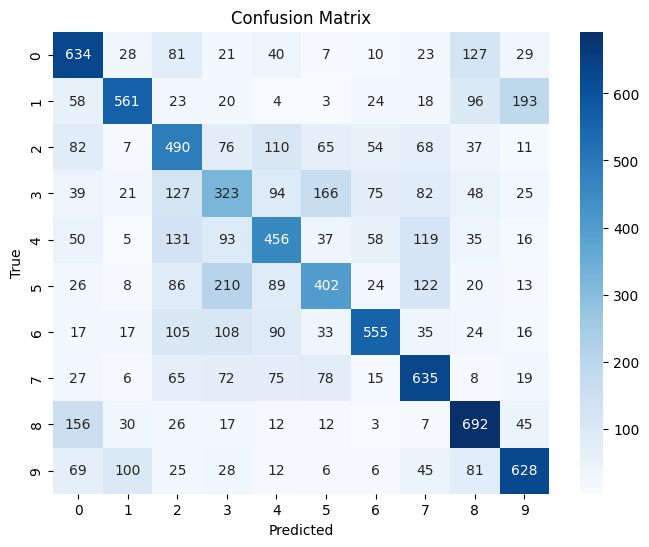

In [32]:
predictions = model1.predict(x_test_cifar10)
conf_matrix = confusion_matrix(np.argmax(y_test_cifar10, axis=1), np.argmax(predictions, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [33]:
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_test_cifar10, axis=1), np.argmax(predictions, axis=1), average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Precision: 0.5429120125322885
Recall: 0.5376
F1 Score: 0.5369712884281505
